In [1]:
 #Importing Various Modules
 # Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [2]:
origin = 'C:/Users/awadh/Data Science/Leaf Predection/dataset'
files = os.listdir(origin)

print(files)

files_dir = os.listdir

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [3]:
import os

def print_directory_paths(directory_path):
  """Prints the path of all directories in the specified directory and its subdirectories."""
  for current_path, directories, files in os.walk(directory_path):
    print("'"+current_path+"'"+",")

print_directory_paths('C:/Users/awadh/Data Science/Leaf Predection/dataset')


'C:/Users/awadh/Data Science/Leaf Predection/dataset',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Apple___Apple_scab',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Apple___Black_rot',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Apple___Cedar_apple_rust',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Apple___healthy',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Blueberry___healthy',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Cherry_(including_sour)___healthy',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Cherry_(including_sour)___Powdery_mildew',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Corn_(maize)___Common_rust_',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Corn_(maize)___healthy',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Corn_(maize)___Northern_Leaf_Blight',
'C:/Users/awadh/Data Science/

In [4]:
X=[]
Z=[]
IMG_SIZE=64
b= ['C:/Users/awadh/Data Science/Leaf Predection/dataset\Apple___Apple_scab',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Apple___Black_rot',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Apple___Cedar_apple_rust',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Apple___healthy',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Blueberry___healthy',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Cherry_(including_sour)___healthy',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Cherry_(including_sour)___Powdery_mildew',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Corn_(maize)___Common_rust_',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Corn_(maize)___healthy',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Corn_(maize)___Northern_Leaf_Blight',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Grape___Black_rot',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Grape___Esca_(Black_Measles)',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Grape___healthy',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Orange___Haunglongbing_(Citrus_greening)',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Peach___Bacterial_spot',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Peach___healthy',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Pepper,_bell___Bacterial_spot',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Pepper,_bell___healthy',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Potato___Early_blight',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Potato___healthy',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Potato___Late_blight',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Raspberry___healthy',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Soybean___healthy',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Squash___Powdery_mildew',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Strawberry___healthy',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Strawberry___Leaf_scorch',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Tomato___Bacterial_spot',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Tomato___Early_blight',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Tomato___healthy',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Tomato___Late_blight',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Tomato___Leaf_Mold',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Tomato___Septoria_leaf_spot',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Tomato___Spider_mites Two-spotted_spider_mite',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Tomato___Target_Spot',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Tomato___Tomato_mosaic_virus',
'C:/Users/awadh/Data Science/Leaf Predection/dataset\Tomato___Tomato_Yellow_Leaf_Curl_Virus']

a = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 
     'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 
     'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 
     'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 
     'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 
     'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 
     'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy',
     'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight',
     'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 
     'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 
     'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']



In [5]:
def assign_label(img,character_type):
    return character_type

In [6]:
def make_train_data(character_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,character_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))

In [7]:

for i in range (len(a)):
    make_train_data(a[i],b[i])
print(len(X))

100%|██████████| 2451/2451 [00:09<00:00, 250.26it/s]

87867


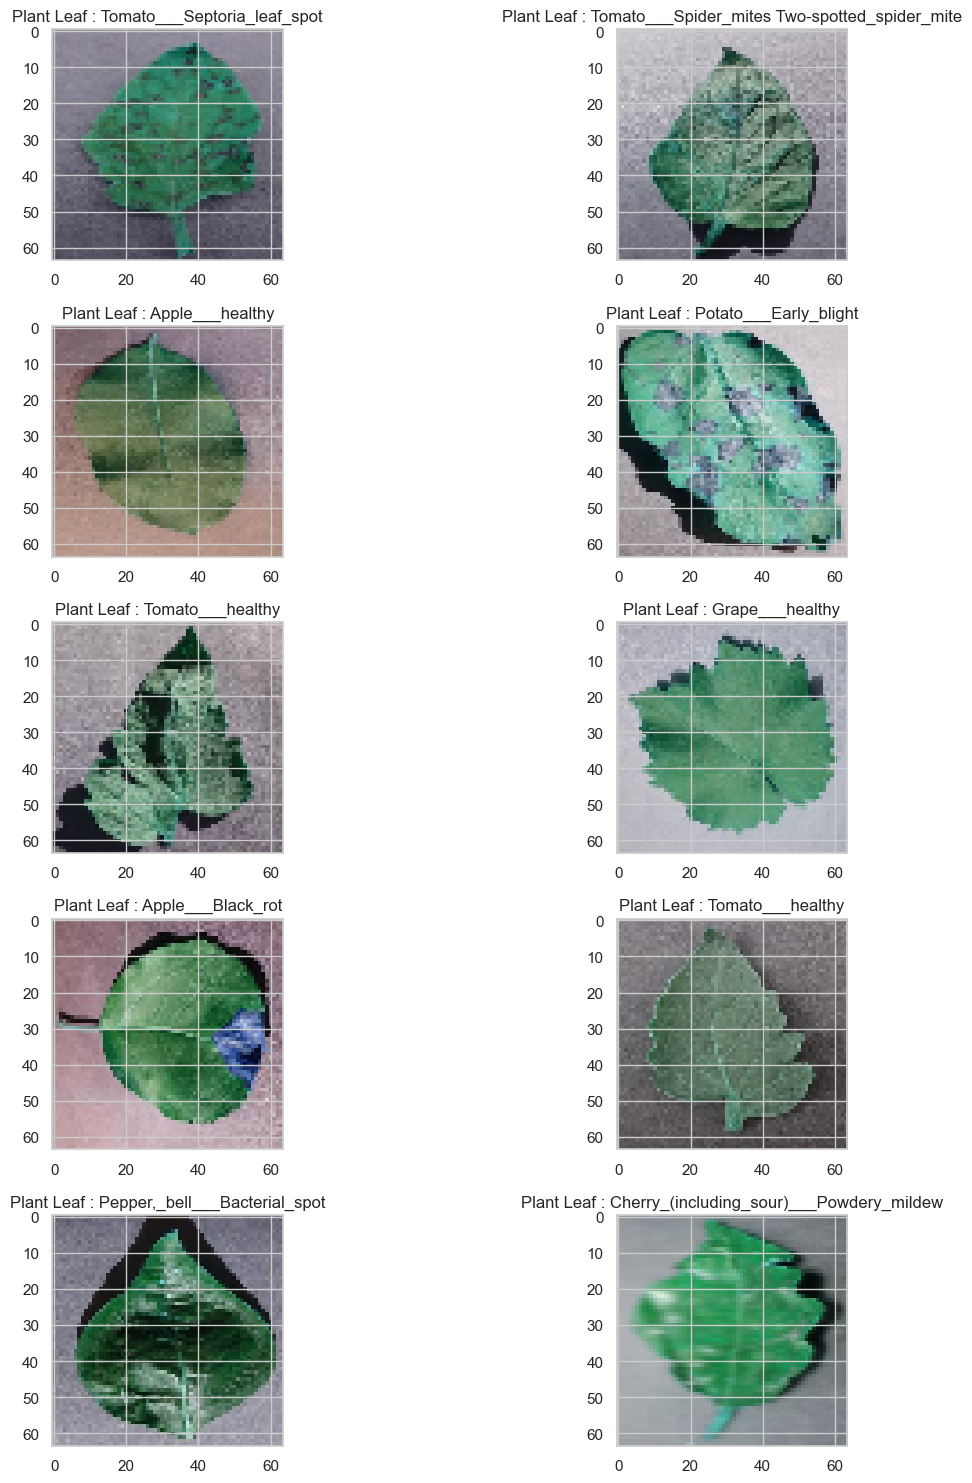

In [8]:
#Visualizing some Random Images
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Plant Leaf : '+Z[l])

plt.tight_layout()

In [9]:
#Label Encoding the Y array  then One Hot Encoding
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,38)
X=np.array(X)
X=X/255

In [10]:
#Using a LR Annealer
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)


In [11]:
#Data Augmentation to prevent Overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images




In [33]:
 #Evaluating the Model Performance
def model_loss():
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train', 'test'])
    plt.savefig('model_loss.png')
    plt.show()
    

In [34]:
def model_accuracy():
    plt.plot(History.history['accuracy'])
    plt.plot(History.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'test'])
    plt.savefig('model_accuracy.png')
    plt.show()
    

In [14]:
#Visualizing Predictons on the Validation Set
# getting predictions on val set.
def prediction(x_test,y_test,model):
    pred=model_1.predict(x_test)
    pred_digits=np.argmax(pred,axis=1)
    return pred,pred_digits,model

In [15]:
def classified_character():
    count=0
    for i in range (len(prop_class)):
        #print(str(i) + " hello")
        print(str(i) +" "+ "Predicted Plant Leaf :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"    "+
              "Actual Plant Leaf : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        count+=1

def misclassified_charcter():
    count=0
    for i in range (len(mis_class)):
        #print(str(i) + " hello")
        print(str(i)+" "+"Predicted Plant Leaf :"+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"   "+
              "Actual Plant Leaf : "+str(le.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        count+=1

In [16]:
# Splitting into Training and Validation Sets
def split(X,Y,test_size):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=test_size)
    print("X_tain : - ",x_train.shape)
    print("X_test : - ",x_test.shape)
    print("Y_tain : - ",y_train.shape)
    print("Y_test : - ",y_test.shape)
    return x_train,x_test,y_train,y_test



In [17]:

def display():


    # Display the graph of model
    model_loss()
    model_accuracy()


    # now storing some properly as well as misclassified indexes'.



    # print("\n CLASSIFIED CHARCTER \n ")
    # classified_character()
    # print("\n")
    # print(" MISSCLASSIFIED CHARCTER \n")
    # misclassified_charcter()


In [18]:
#spliting the dataset
x_train,x_test,y_train,y_test = split(X,Y,0.3)
datagen.fit(x_train)
batch_size=128

X_tain : -  (61506, 64, 64, 3)
X_test : -  (26361, 64, 64, 3)
Y_tain : -  (61506, 38)
Y_test : -  (26361, 38)


<h2> <b> 10</b></h2>

In [20]:
#load the model from device
#specifically for time
import time
model_1 = tf.keras.models.load_model('model.h5')

epochs =100
start = time.time()
#Fitting on the Training set and making predcitons on the Validation set

History = model_1.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

done = time.time()


Epoch 1/100
480/480 [==============================] - 133s 275ms/step - loss: 1.8649 - accuracy: 0.4516 - val_loss: 0.9216 - val_accuracy: 0.7131
Epoch 2/100
480/480 [==============================] - 113s 234ms/step - loss: 0.8136 - accuracy: 0.7425 - val_loss: 0.8293 - val_accuracy: 0.7469
Epoch 3/100
480/480 [==============================] - 112s 233ms/step - loss: 0.5733 - accuracy: 0.8145 - val_loss: 0.5714 - val_accuracy: 0.8135
Epoch 4/100
480/480 [==============================] - 113s 235ms/step - loss: 0.4295 - accuracy: 0.8581 - val_loss: 0.3613 - val_accuracy: 0.8801
Epoch 5/100
480/480 [==============================] - 116s 241ms/step - loss: 0.3648 - accuracy: 0.8797 - val_loss: 0.5266 - val_accuracy: 0.8325
Epoch 6/100
480/480 [==============================] - 116s 241ms/step - loss: 0.3072 - accuracy: 0.8967 - val_loss: 0.2753 - val_accuracy: 0.9061
Epoch 7/100
480/480 [==============================] - 115s 240ms/step - loss: 0.2654 - accuracy: 0.9109 - val_loss: 0

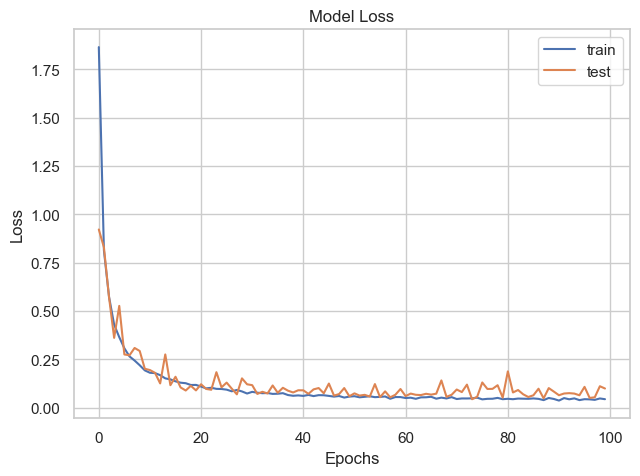

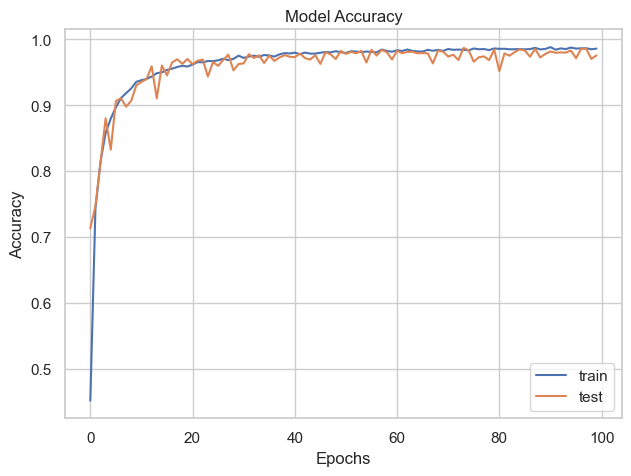

In [35]:
display()

In [22]:
#Visualizing Predictons on the Validation Set
# getting predictions on val set.
pred=model_1.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

824/824 [==============================] - 10s 11ms/step


In [23]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)


i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)

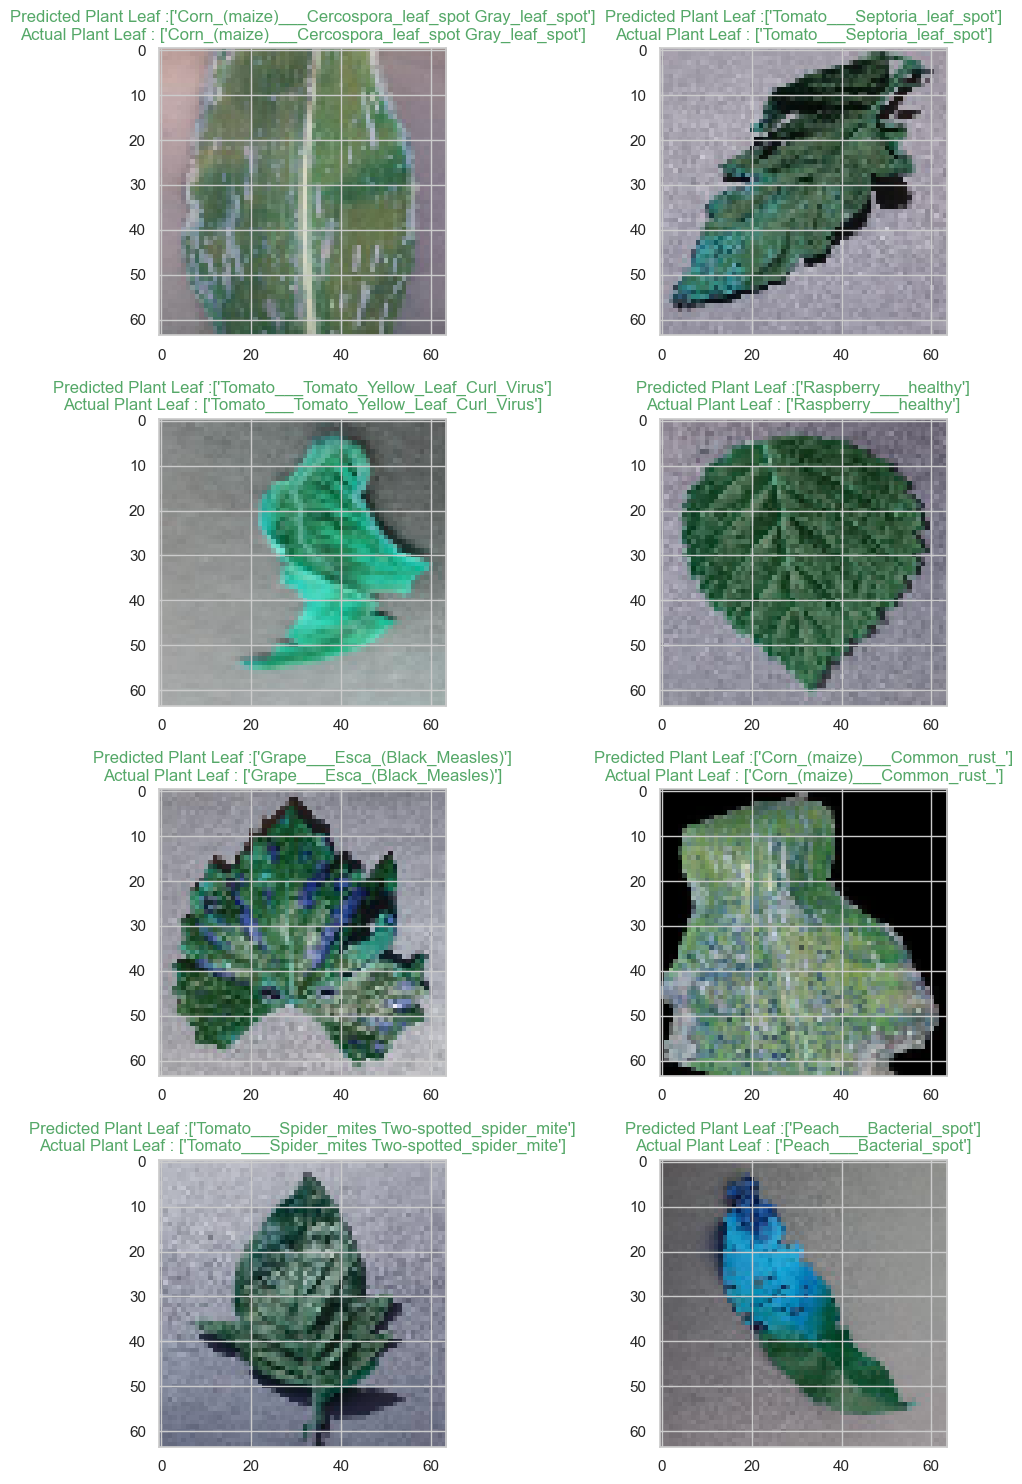

In [24]:
#CORRECTLY CLASSIFIED IMAGES
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Plant Leaf :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Plant Leaf : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])),color = 'g')
        plt.tight_layout()
        count+=1

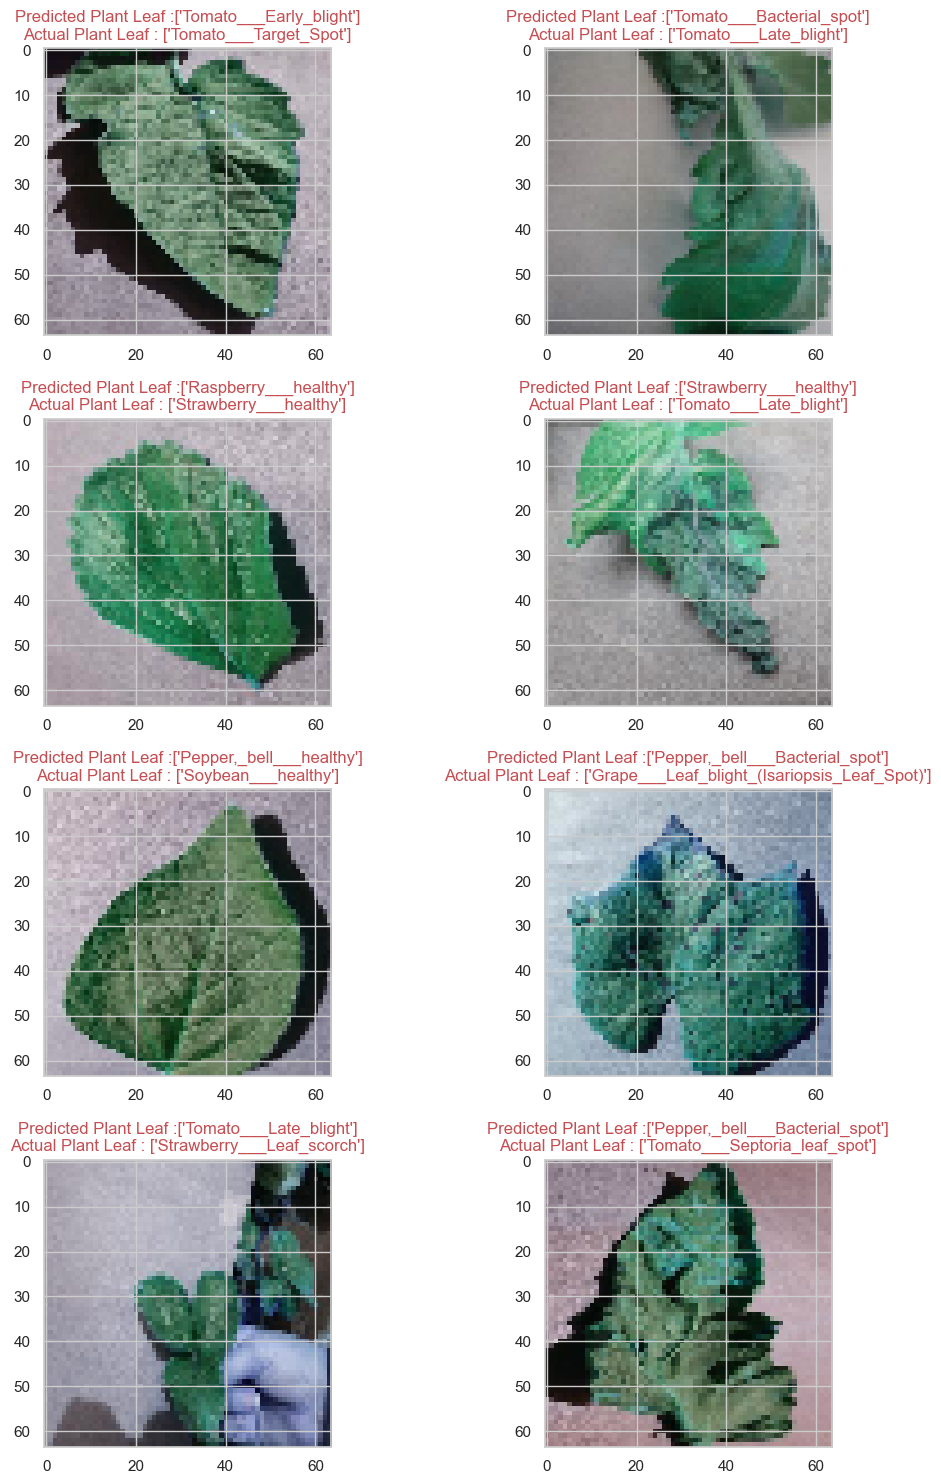

In [25]:
#MISCLASSIFIED IMAGES 
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Plant Leaf :"+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Plant Leaf : "+str(le.inverse_transform([np.argmax(y_test[mis_class[count]])])),color = 'r')
        plt.tight_layout()
        count+=1